Training agent with Learning Rate of  0.05
Final Win Rate:  0.22466666666666665
Training agent with Learning Rate of  0.1
Final Win Rate:  0.288
Training agent with Learning Rate of  0.15000000000000002
Final Win Rate:  0.3393333333333333
Training agent with Learning Rate of  0.2
Final Win Rate:  0.30866666666666664
Training agent with Learning Rate of  0.25
Final Win Rate:  0.36
Training agent with Learning Rate of  0.3
Final Win Rate:  0.30533333333333335
Testing agent with Learning Rate of  0.05
{'[ 1.  0.  0. -1.  1. -1.  1. -1.  1.]': 0.0975, '[ 0.  0.  0.  0.  1. -1.  1. -1.  1.]': 0.0792718021012783, '[ 0.  0.  0.  0.  0.  0.  1. -1.  1.]': 0.015789568986594515, '[0. 0. 0. 0. 0. 0. 0. 0. 1.]': 0.0785170868963208, '[ 1. -1.  1. -1.  1. -1. -1.  1.  1.]': 0.2262190625, '[ 0.  0.  1. -1.  1. -1. -1.  1.  1.]': -0.04649375, '[ 0.  0.  0.  0.  1. -1. -1.  1.  1.]': 0.002641432315970937, '[ 0.  0.  0.  0.  0.  0. -1.  1.  1.]': -6.265683832495122e-05, '[ 1.  0.  0.  1. -1.  1. -1.  1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:364: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Testing agent with Exploration Rate of  0.6000000000000001
{'[ 1. -1.  1.  1.  1. -1. -1. -1.  1.]': 0.5904, '[ 0.  0.  1.  1.  1. -1. -1. -1.  1.]': 0.04000000000000001, '[ 0.  0.  1.  1.  0.  0. -1. -1.  1.]': 0.076352, '[ 0.  0.  1.  0.  0.  0.  0. -1.  1.]': 0.11370521146355278, '[0. 0. 0. 0. 0. 0. 0. 0. 1.]': 0.031455176848102465, '[ 1.  0.  0.  1.  1. -1. -1.  1. -1.]': -0.1, '[ 1.  0.  0.  1.  0. -1.  0.  1. -1.]': -0.116, '[ 1.  0.  0.  0.  0.  0.  0.  1. -1.]': -0.030374400000000003, '[1. 0. 0. 0. 0. 0. 0. 0. 0.]': 0.027555795074878896, '[ 0.  0.  1.  1. -1.  1. -1. -1.  1.]': 0.2, '[ 0.  0.  0.  1.  0.  0.  0. -1.  1.]': -0.006717542399999998, '[0. 0. 0. 1. 0. 0. 0. 0. 0.]': -0.012214862168865014, '[ 1. -1.  1.  1. -1.  1. -1.  1. -1.]': 0.17315645440000002, '[ 0.  0.  1.  1. -1.  1. -1.  1. -1.]': 0.020800000000000003, '[ 0.  0.  0.  1.  0.  1. -1.  1. -1.]': 0.005440000000000001, '[ 0.  0.  0.  1.  0.  0.  0.  1. -1.]': -0.07189441217626112, '[ 1.  1.  0.  1.  0. -1.  1. -1

<Figure size 432x288 with 0 Axes>

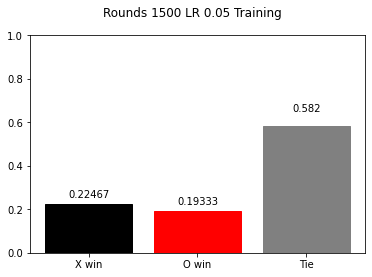

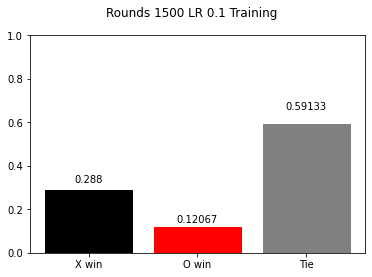

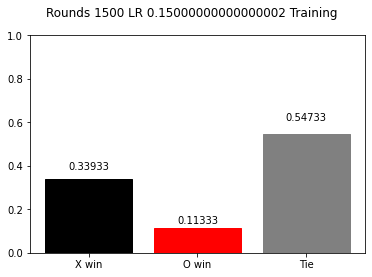

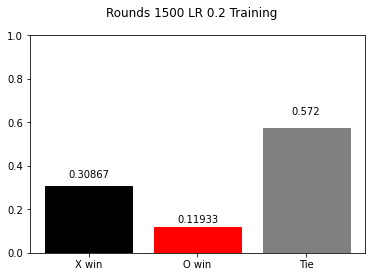

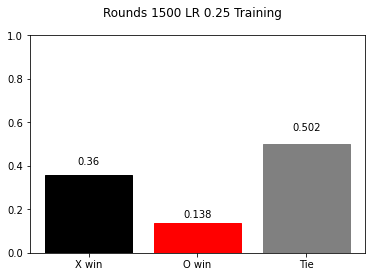

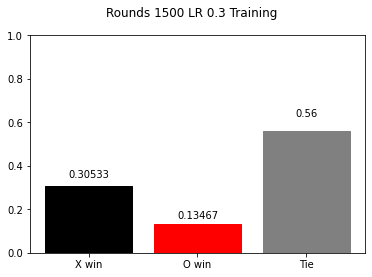

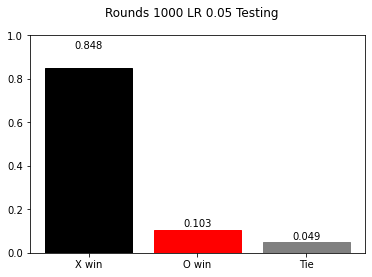

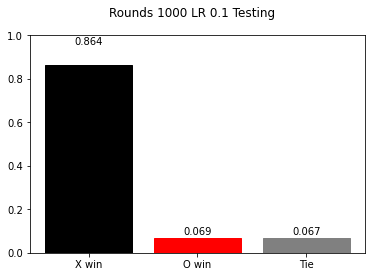

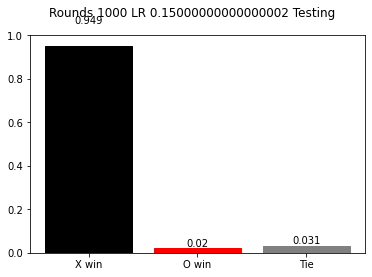

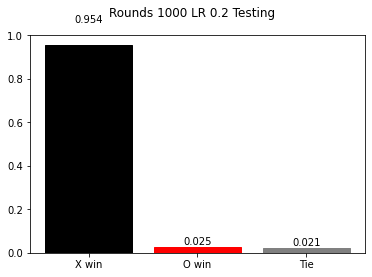

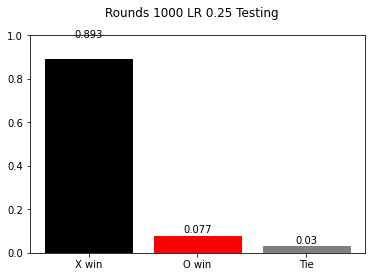

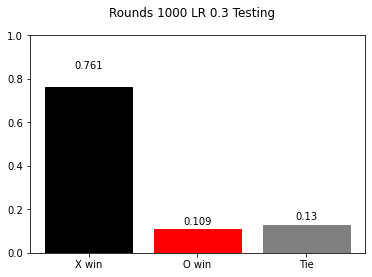

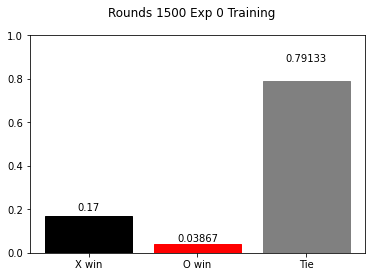

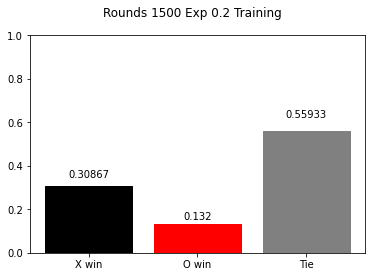

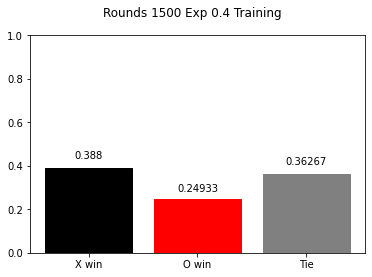

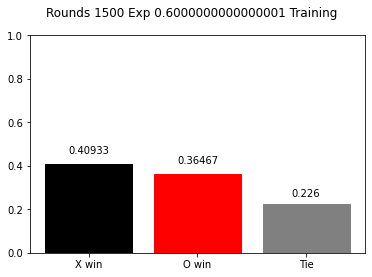

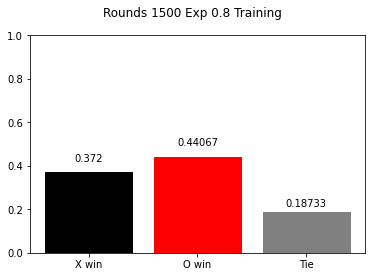

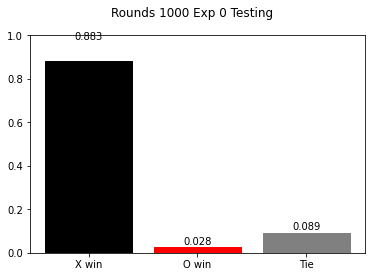

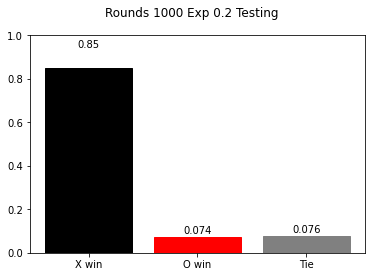

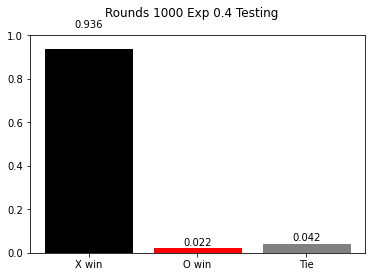

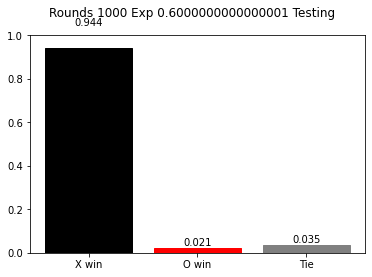

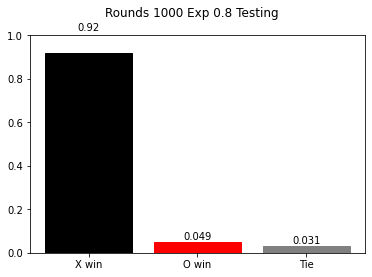

In [ ]:
# -*- coding: utf-8 -*-


import numpy as np
import pickle
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl import load_workbook
from xlwt import Workbook

class State:
    def __init__(self, p1, p2, boardSize):
        self.board = np.zeros((BOARD_ROWS, BOARD_COLS))  # create board
        self.p1 = p1
        self.p2 = p2
        self.p1win = 0
        self.tie = 0
        self.boardString = None  # board that is converted to string will be stored in boardString so it can be used as a key to retrieve the value from the hashmap
        # init p1 plays first
        # attr to store what game users want to play. options are c3 = tic tac toe, c4 connect 4, c5 = gomoku(connect 5)
        self.boardSize = boardSize
        self.winCheck = boardSize + "_winner"  # fun to check winner of a game
        self.roundL = []
        self.percentages = []

    # function to convert the board in to a string
    def doStringify(self):
        self.boardString = str(self.board.reshape(BOARD_COLS * BOARD_ROWS))
        return self.boardString
    
    # function that checks if the game is over and the winner of the game when game type is c3
    def c3_winner(self):
        # Horizontal Check
        for i in range(BOARD_ROWS):
            if sum(self.board[i, :]) == 3:
                return 1
            if sum(self.board[i, :]) == -3:
                return -1
        # Vertical Check
        for i in range(BOARD_COLS):
            if sum(self.board[:, i]) == 3:
                return 1
            if sum(self.board[:, i]) == -3:
                return -1
        # Acending Diagonal Check
        diag_sum1 = sum([self.board[i, i] for i in range(BOARD_COLS)])
        # Descedning Diagonal Check
        diag_sum2 = sum([self.board[i, BOARD_COLS - i - 1]
                        for i in range(BOARD_COLS)])
        diag_sum = max(abs(diag_sum1), abs(diag_sum2))
        if diag_sum == 3:
            if diag_sum1 == 3 or diag_sum2 == 3:
                return 1
            else:
                return -1
        # tie
        # no available positions
        if len(self.openPositions()) == 0:
            return 0
        # has not ended
        return None

    # function that checks if the game is over and the winner of the game when game type is c4
    def c4_winner(self):
        # Horizontal Check
        row = BOARD_ROWS
        col = BOARD_COLS
        for j in range(row-3):
            for i in range(col):
                if self.board[i][j] == 1 and self.board[i][j+1] == 1 and self.board[i][j+2] == 1 and self.board[i][j+3] == 1:
                    return 1
        for j in range(row-3):
            for i in range(col
                           ):
                if self.board[i][j] == -1 and self.board[i][j+1] == -1 and self.board[i][j+2] == -1 and self.board[i][j+3] == -1:
                    return -1

        # Vertical Check
        for i in range(col-3):
            for j in range(row):
                if self.board[i][j] == 1 and self.board[i+1][j] == 1 and self.board[i+2][j] == 1 and self.board[i+3][j] == 1:
                    return 1
        for i in range(col-3):
            for j in range(row):
                if self.board[i][j] == -1 and self.board[i+1][j] == -1 and self.board[i+2][j] == -1 and self.board[i+3][j] == -1:
                    return -1

        # Acending Diagonal Check
        for i in range(3, col, 1):
            for j in range(row-3):
                if self.board[i][j] == 1 and self.board[i-1][j+1] == 1 and self.board[i-2][j+2] == 1 and self.board[i-3][j+3] == 1:
                    return 1
        for i in range(3, col, 1):
            for j in range(row-3):
                if self.board[i][j] == -1 and self.board[i-1][j+1] == -1 and self.board[i-2][j+2] == -1 and self.board[i-3][j+3] == -1:
                    return -1

        # Descedning Diagonal Check
        for i in range(3, col, 1):
            for j in range(3, row, 1):
                if self.board[i][j] == 1 and self.board[i-1][j-1] == 1 and self.board[i-2][j-2] == 1 and self.board[i-3][j-3] == 1:
                    return 1
        for i in range(3, col, 1):
            for j in range(3, row, 1):
                if self.board[i][j] == -1 and self.board[i-1][j-1] == -1 and self.board[i-2][j-2] == -1 and self.board[i-3][j-3] == -1:
                    return -1

        # tie
        # no available positions
        if len(self.openPositions()) == 0:
            return 0
        # has not ended
        return None

    # function that checks if the game is over and the winner of the game when game type is c5
    def c5_winner(self):
        # Horizontal Check
        row = BOARD_ROWS
        col = BOARD_COLS
        for j in range(row-4):
            for i in range(col):
                if self.board[i][j] == 1 and self.board[i][j+1] == 1 and self.board[i][j+2] == 1 and self.board[i][j+3] == 1 and self.board[i][j+4] == 1:
                    return 1
        for j in range(row-4):
            for i in range(col):
                if self.board[i][j] == -1 and self.board[i][j+1] == -1 and self.board[i][j+2] == -1 and self.board[i][j+3] == -1 and self.board[i][j+4] == -1:
                    return -1

        # Vertical Check
        for i in range(col-4):
            for j in range(row):
                if self.board[i][j] == 1 and self.board[i+1][j] == 1 and self.board[i+2][j] == 1 and self.board[i+3][j] == 1 and self.board[i+4][j] == 1:
                    return 1
        for i in range(col-4):
            for j in range(row):
                if self.board[i][j] == -1 and self.board[i+1][j] == -1 and self.board[i+2][j] == -1 and self.board[i+3][j] == -1 and self.board[i+4][j] == -1:
                    return -1

        # Acending Diagonal Check
        for i in range(4, col, 1):
            for j in range(row-4):
                if self.board[i][j] == 1 and self.board[i-1][j+1] == 1 and self.board[i-2][j+2] == 1 and self.board[i-3][j+3] == 1 and self.board[i-4][j+4] == 1:
                    return 1
        for i in range(4, col, 1):
            for j in range(row-4):
                if self.board[i][j] == -1 and self.board[i-1][j+1] == -1 and self.board[i-2][j+2] == -1 and self.board[i-3][j+3] == -1 and self.board[i-4][j+4] == -1:
                    return -1

        # Descedning Diagonal Check
        for i in range(4, col, 1):
            for j in range(4, row, 1):
                if self.board[i][j] == 1 and self.board[i-1][j-1] == 1 and self.board[i-2][j-2] == 1 and self.board[i-3][j-3] == 1 and self.board[i-4][j-4] == 1:
                    return 1
        for i in range(4, col, 1):
            for j in range(4, row, 1):
                if self.board[i][j] == -1 and self.board[i-1][j-1] == -1 and self.board[i-2][j-2] == -1 and self.board[i-3][j-3] == -1 and self.board[i-4][j-4] == -1:
                    return -1

        # tie
        # no available positions
        if len(self.openPositions()) == 0:
            return 0
        # has not ended
        return None

    # when the game is over, increment the winner so it can be used to calculate winrate, give reward to p1 and p2 based on the result of the game, and startOver values to start new game
    def gameFinished(self, winner):
        if winner == 1:
            self.p1win += 1
        elif winner == 0:
            self.tie += 1
        self.giveReward()
        self.p1.startOver()
        self.p2.startOver()
        self.startOver()

    # function that returns all the available moves than each player can take

    def openPositions(self):
        positions = []
        for i in range(BOARD_ROWS):  # as you iterate the board
            for j in range(BOARD_COLS):
                if self.board[i, j] == 0:  # if the value is 0, means that index is vacant
                    # add the empty index to array that stores all possible positions that user can take
                    positions.append((i, j))
        return positions

    # function to give reward or punishment based on result of the game

    def giveReward(self):
        result = getattr(self, self.winCheck)()
        reward = 1
        punishment = -0.5
        if result == 1: # case when p1 is winner
            self.p1.giveReward(reward)  # give reward to p1
            self.p2.giveReward(punishment)  # give punishment to p2
        elif result == -1:
            self.p1.giveReward(punishment)
            self.p2.giveReward(reward)
        else:
            self.p1.giveReward(0.2)
            self.p2.giveReward(0.5)

    # function to reset the board
    def startOver(self):
        self.board = np.zeros((BOARD_ROWS, BOARD_COLS))
        self.boardString = None

    # function to decide user's move and update the board
    def moveAndUpdate(self, whosTurn, purpose):
        positions = self.openPositions()
        if whosTurn == 1:  # if it is p1's turn
            # function to decide player's next move, returned value is tuple which will be used to fill the index of the game board
            p1_action = self.p1.nextMove(
                positions, self.board, self.p1.symbol)
            # if players move is decided,fill p1_move(index on board) with players symbol(x or o)
            self.board[p1_action] = self.p1.symbol
            board_hash = self.doStringify()  # convert current board into string
            if purpose == "train":  # if the purpose of the game is to train the model
                # then store all the board that contains every moves that user took in states, so the reward can be assigned to each states when the game is over
                self.p1.states.append(board_hash)
            # stores the index of all the moves that users took
            self.p1.moves.append(p1_action)
        else:
            p2_move = None
            if purpose == "play":  # if user is playing against the A.I then no need to store any values for training, add this line above if user wants to play as first player against A.I
                p2_move = self.p2.nextMove(positions)
            else:  # if the purpose of the game is to train model
                p2_move = self.p2.nextMove(
                    positions, self.board, self.p2.symbol)
            self.board[p2_move] = self.p2.symbol
            board_hash = self.doStringify()
            if purpose == "train":
                self.p2.states.append(board_hash)
            self.p2.moves.append(p2_move)

    # function to display the result of the game
    def showWinner(self, winner):
        if winner == 1:
            print(self.p1.name, "wins!")
        elif winner == -1:
            print(self.p2.name, "wins!")
        else:
            print("tie!")
    # function to train the policy

    def train(self, rounds=1000):
        for i in range(rounds):
            # print(i)
            # append the percentage every 10 rounds
            if i % 10 == 0 and i != 0:
                self.roundL.append(i)
                curWinRate = self.p1win / i
                self.percentages.append(curWinRate)
            while True:
                # Player 1
                # make move based on policy and update board
                self.moveAndUpdate(1, "train")
                # check if the game is over or not and if over check who the winner is
                win = getattr(self, self.winCheck)()
                if win is not None:  # if the game is over
                    # ended with p1 either win or draw
                    self.gameFinished(win)
                    break

                # Player 2
                self.moveAndUpdate(-1, "train")
                win = getattr(self, self.winCheck)()
                if win is not None:
                    self.gameFinished(win)
                    break

    def train_test(self, rounds=100):
        for i in range(rounds):
            # print(i)
            # append the percentage every 10 rounds
            if i % 10 == 0 and i != 0:
                self.roundL.append(i)
                curWinRate = self.p1win / i
                self.percentages.append(curWinRate)
            while True:
                # Player 1
                # make move based on policy and update board
                self.moveAndUpdate(1, "train_test")
                # check if the game is over or not and if over check who the winner is
                win = getattr(self, self.winCheck)()
                if win is not None:  # if the game is over
                    # ended with p1 either win or draw
                    self.gameFinished(win)
                    break

                # Player 2
                self.moveAndUpdate(-1, "train_test")
                win = getattr(self, self.winCheck)()
                if win is not None:
                    self.gameFinished(win)
                    break
    # play with human

    def play(self):
        while True:
            # Player 1
            self.moveAndUpdate(1, "play")
            self.showBoard()
            # check board status if it is end
            win = getattr(self, self.winCheck)()
            if win is not None:
                self.showWinner(win)
                self.startOver()
                break

            self.moveAndUpdate(-1, "play")
            self.showBoard()
            win = getattr(self, self.winCheck)()
            if win is not None:
                self.showWinner(win)
                self.startOver()
                break
    # function to show board so the user can see the board and decide which move to make

    def showBoard(self):
        # p1: x  p2: o
        horline = ""
        if self.boardSize == "c3":
            horline = '---------------'
            print("    1   2   3")
        elif self.boardSize == "c4":
            horline = '-----------------------------------'
            print("    1   2   3   4   5   6   7   8")
        else:
            horline = '--------------------------------------------------------'
            print("    1   2   3   4   5   6   7   8   9  10  11  12  13")
        for i in range(0, BOARD_ROWS):
            print(horline)
            if i < 9:
                out = "0"+str(i+1)+'| '
            else:
                out = str(i+1)+'| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = 'x'
                if self.board[i, j] == -1:
                    token = 'o'
                if self.board[i, j] == 0:
                    token = ' '
                out += token + ' | '
            print(out)
        print(horline)

    def print_graph(self):
        fig = plt.figure()
        wonList = self.p1win
        roundsList = self.roundL
        percentageList = self.percentages
        plt.plot(roundsList, percentageList, label='P1 Win')

    def print_stats(self, title, numRounds):
        rounds = numRounds
        p2Win = rounds - self.p1win - self.tie
        fig = plt.figure()
        fig.suptitle(title)
        sub = fig.add_subplot(1,1,1)
        x_labels = ["X win", 'O win', 'Tie']
        percentages = [self.p1win / rounds, p2Win / rounds, self.tie / rounds]
        bar_graph = sub.bar(x_labels, [percentages[0], percentages[1], percentages[2]])
        bar_graph[0].set_color('black')
        bar_graph[1].set_color('red')
        bar_graph[2].set_color('grey')
        sub.set_ylim((0,1))
        for i in range(len(bar_graph)):
            # place text at the center top of the bars
            sub.text(bar_graph[i].get_x() + bar_graph[i].get_width() / 2., # x pos
                    1.1 * bar_graph[i].get_height(), # y pos
                    round(percentages[i], 5), # value
                    ha='center', va='bottom') 
        plt.draw()    


class Player:
    def __init__(self, name, symbol, exp_rate=0.3, lr=0.3):
        self.name = name  # name of player
        self.states = []  # record all positions taken
        self.lr = lr  # learning rate
        self.exp_rate = exp_rate  # exploration rate
        self.states_value = {}  # state -> value
        self.symbol = symbol  # symbol of the player
        self.moves = []  # array to store all index of the moves that user makes

    # function to add values to each state when the game is over
    def giveReward(self, reward):
        # starting from the last state(board when the game is over) to first state
        for st in reversed(self.states):
            # if state is not yet stored in the map
            if self.states_value.get(st) is None:
                # then push the state as a key with 0 as the value
                self.states_value[st] = 0
            # assign a value to the state,eq to assign value is val_cur_state = val_cur_state + lr(val_next_state-val_cur_state)
            self.states_value[st] += self.lr * (reward - self.states_value[st])
            # update val_next_state, now val_cur_state becomes a val_next_state
            reward = self.states_value[st]

    def doStringify(self, board):
        boardString = str(board.reshape(BOARD_COLS * BOARD_ROWS))
        return boardString

    def nextMove(self, positions, board, symbol):
        # if the random number generated is less than the exporation rate, it randomly choose next move from availabe positions
        if np.random.uniform(0, 1) <= self.exp_rate:
            # take random action
            idx = np.random.choice(len(positions))
            action = positions[idx]
        # if exploitation which is deciding next move based on the policy
        else:
            value_max = -1
            first = True
            for p in positions:  # itereate thourgh all vacant position
                board[p] = symbol  # first fill the index with players symbol
                # and convert it to a a string to use as key
                boardString = self.doStringify(board)

                # now using key check the value of the state, if the value of the state is high means that taking the move leads to a higher chance of winning
                if (self.states_value.get(boardString) is None):
                    value = 0
                else:
                    value = self.states_value.get(boardString)
                
                # print("value", value)
                if value >= value_max:  # therefore out of all available indexs choose the one with highest value
                    value_max = value
                    action = p
                # return the board back to previous state because the move has not been made yet
                board[p] = 0
        return action

    # append a hash state
    def addState(self, state):
        self.states.append(state)

    def startOver(self):
        self.states = []
        self.moves = []

    def savePolicy(self, sheet1, wb, fileName):
        row = 0
        for key in self.states_value:
            sheet1.write(row, 0, key)
            sheet1.write(row, 1, self.states_value[key])
            row += 1
        wb.save(fileName)

        fw = open(fileName, 'wb')
        pickle.dump(self.states_value, fw)
        fw.close()

    def loadPolicy(self, fileName):  

        # df = pd.read_excel(fileName, index_col=0).to_dict()
        # self.states_value = df

        fr = open(fileName, 'rb')
        self.states_value = pickle.load(fr)
        print(self.states_value)
        fr.close()
    
    
class HumanPlayer:
    def __init__(self, name, symbol):
        self.name = name
        self.symbol = symbol
        self.moves = []

    def nextMove(self, positions):
        while True:
            row = int(input("Enter row num:"))
            col = int(input("Enter col num:"))
            move = (row-1, col-1)
            if move in positions:
                return move

def test_trained_agent_lr(boardSize, rounds, testingRounds ,expRate, learnRate):
  # exploration = 1 random, exploaration = 0, follow the policy
    fig = plt.figure(1)
    lr = learnRate
    lrList = []
    policyList = ['policy'+str(x) for x in range(6)]
    #first train
    for i in range(6):
        title = ("Rounds " +  str(rounds) + " LR " + str(lr) + " Training")
        print("Training agent with Learning Rate of ", lr)
        wb = Workbook()
        sheet1 = wb.add_sheet('Sheet 1')
        p1 = Player("p1", 1, expRate, lr)
        p2 = Player("p2", -1, expRate, 0.1)
        stTrain = State(p1, p2, boardSize)
        stTrain.train(rounds)
        p1.savePolicy(sheet1, wb, policyList[i])
        lrList.append(lr)
        lr = lr + 0.05
        roundsList = stTrain.roundL
        percentageList = stTrain.percentages
        stTrain.print_stats(title, rounds)
        # plt.plot(roundsList, percentageList, label='LR')
        print("Final Win Rate: ", stTrain.p1win/rounds)
 
    # plt.legend(lrList, loc='upper right')
    # plt.title('Rounds vs P1 Win Rate | TRAINING | LR')
    # plt.xlabel('Rounds #')
    # plt.ylabel("Winning Rate")
    #second test
    fig = plt.figure(2)
    lr = learnRate
    for i in range(6):
        title = ('Rounds ' + str(testingRounds) + ' LR ' + str(lrList[i]) + ' Testing')
        print("Testing agent with Learning Rate of ", lr)
        p1 = Player("p1", 1, 0, 0)
        p1.loadPolicy(policyList[i])
        p2 = Player("p2", -1, 1, 0)
        stTest = State(p1, p2, boardSize)
        stTest.train_test(testingRounds)
        # stTest.print_graph()
        lr = lr + 0.05
        roundsList = stTest.roundL
        percentageList = stTest.percentages
        stTest.print_stats(title, testingRounds)
        # plt.plot(roundsList, percentageList, label='LR')
        
    # plt.legend(lrList, loc='upper right')
    # plt.title('Rounds vs P1 Win Rate | TESTING | LR')
    # plt.xlabel('Rounds #')
    # plt.ylabel("Winning Rate")

    # stTest.print_graph()

def test_trained_agent_exp(boardSize, rounds, testingRounds, expRate, learnRate):
  # exploration = 1 random, exploaration = 0, follow the policy
    fig = plt.figure(3)
    exp = expRate
    expList = []
    policyList = ['policy'+str(x) for x in range(5)]
    #first train
    for i in range(5):
        title = ('Rounds ' + str(rounds) + ' Exp ' + str(exp) + ' Training')
        print("Training agent with Exploration Rate of ", exp)
        wb = Workbook()
        sheet1 = wb.add_sheet('Sheet 1')
        p1 = Player("p1", 1, exp, learnRate)
        p2 = Player("p2", -1, 0.2, learnRate)
        stTrain = State(p1, p2, boardSize)
        stTrain.train(rounds)
        p1.savePolicy(sheet1, wb, policyList[i])
        expList.append(exp)
        exp = exp + 0.2
        roundsList = stTrain.roundL
        percentageList = stTrain.percentages
        stTrain.print_stats(title, rounds)
        # plt.plot(roundsList, percentageList, label='EXP')
        print("Final Win Rate: ", stTrain.p1win/rounds)


    # plt.legend(expList, loc='upper right')
    # plt.title('Rounds vs P1 Win Rate | TRAINING | EXP')
    # plt.xlabel('Rounds #')
    # plt.ylabel("Winning Rate")

    #second test
    fig = plt.figure(4)
    exp = expRate
    for i in range(5):
        title = ('Rounds ' + str(testingRounds) + ' Exp ' + str(expList[i]) + ' Testing')
        print("Testing agent with Exploration Rate of ", exp)
        p1 = Player("p1", 1, 0, 0) # name,symbol,exp,lr
        p1.loadPolicy(policyList[i])
        p2 = Player("p2", -1, 1, 0)
        stTest = State(p1, p2, boardSize)
        stTest.train_test(testingRounds)
        exp = exp + 0.2
        roundsList = stTest.roundL
        percentageList = stTest.percentages
        stTest.print_stats(title, testingRounds)
        # plt.plot(roundsList, percentageList, label='EXP')

        

    # plt.legend(expList, loc='upper right')
    # plt.title('Rounds vs P1 Win Rate | TESTING | EXP')
    # plt.xlabel('Rounds #')
    # plt.ylabel("Winning Rate")


if __name__ == "__main__":

    boardSize = "c3"
    rounds = 30000
    p1exp = 0.2 #+0.2...
    p2exp = 0.2
    p1lr = 0.1
    p2lr = 0.1

    wb = Workbook()
    sheet1 = wb.add_sheet('Sheet 1')
    # 3,8,13
    if boardSize == "c3":
        BOARD_ROWS = 3
        BOARD_COLS = 3
    elif boardSize == "c4":
        BOARD_ROWS = 4
        BOARD_COLS = 4
    else:
        BOARD_ROWS = 13
        BOARD_COLS = 13
    # training
    p1 = Player("p1", 1, p1exp, p1lr)
    p2 = Player("p2", -1, p2exp, p2lr)

    trainingRounds = 1500
    testingRounds = 1000
# board size , rounds, expRate, lr
    test_trained_agent_lr(boardSize, trainingRounds, testingRounds, 0.2, 0.05)
    test_trained_agent_exp(boardSize, trainingRounds, testingRounds, 0, 0.2)
    plt.show()
# comment out for testing a policy1

